In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
df = pd.read_json('ultimate_data_challenge.json')
logins = pd.read_json('logins.json')

In [41]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [42]:
sorted_logins = logins.sort_values(by='login_time', ascending = True)

In [43]:
sorted_logins.set_index(sorted_logins.login_time, inplace=True)
sorted_logins['event'] = 1
#sorted_logins['weekday'] = sorted_logins['login_time'].apply(lambda stamp : stamp.isoweekday())
#sorted_logins.drop(columns=['login_time'])

In [44]:
sorted_logins.head()

,login_time,event
login_time,,
1970-01-01 20:12:16,1970-01-01 20:12:16,1
1970-01-01 20:13:18,1970-01-01 20:13:18,1
1970-01-01 20:16:10,1970-01-01 20:16:10,1
1970-01-01 20:16:36,1970-01-01 20:16:36,1
1970-01-01 20:16:37,1970-01-01 20:16:37,1


In [45]:
grouped_logins = sorted_logins.resample('15T').sum()
grouped_logins.head()
grouped_logins= grouped_logins.reset_index()
grouped_logins['weekday'] = grouped_logins['login_time'].apply(lambda stamp : stamp.isoweekday())
grouped_logins.weekday.unique()
day_type_map = np.where((grouped_logins.weekday == 6)|(grouped_logins.weekday == 7),
    'weekend', 'weekday')
grouped_logins['day_type'] = day_type_map

#extract the hour and minute into a separate dataframe column
grouped_logins['timestamp'] = grouped_logins.login_time.apply(lambda login: login.time())
grouped_logins['hour']      = grouped_logins.timestamp.apply(lambda x: x.hour)
grouped_logins['minute']    = grouped_logins.timestamp.apply(lambda x: x.minute)

grouped_logins.head()

,login_time,event,weekday,day_type,timestamp,hour,minute
0,1970-01-01 20:00:00,2,4,weekday,20:00:00,20,0
1,1970-01-01 20:15:00,6,4,weekday,20:15:00,20,15
2,1970-01-01 20:30:00,9,4,weekday,20:30:00,20,30
3,1970-01-01 20:45:00,7,4,weekday,20:45:00,20,45
4,1970-01-01 21:00:00,1,4,weekday,21:00:00,21,0


In [46]:
grouped_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  9788 non-null   datetime64[ns]
 1   event       9788 non-null   int64         
 2   weekday     9788 non-null   int64         
 3   day_type    9788 non-null   object        
 4   timestamp   9788 non-null   object        
 5   hour        9788 non-null   int64         
 6   minute      9788 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 535.4+ KB


In [47]:
#how many weekend and weekday events are there is the list?
grouped_logins.day_type.value_counts()

weekday    6908
weekend    2880
Name: day_type, dtype: int64

<AxesSubplot:xlabel='event', ylabel='Count'>

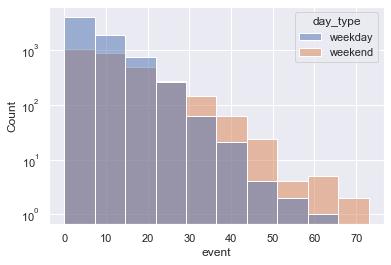

In [90]:
sns.histplot(data=grouped_logins, x='event',  hue='day_type',log_scale = [0, 10],bins=10  )

In [49]:
weekend = grouped_logins.loc[grouped_logins.day_type == 'weekend']
weekday = grouped_logins.loc[grouped_logins.day_type == 'weekday']

In [68]:
total_weekday_riders = weekday.event.sum()
total_weekend_riders = weekend.event.sum()
print(total_weekday_riders)
print(total_weekend_riders)
total_weekend_riders/ (total_weekday_riders+total_weekend_riders)
total_weekday_riders/ (total_weekday_riders+total_weekend_riders)

55598
37544


0.5969165360417427

<AxesSubplot:xlabel='weekday', ylabel='event'>

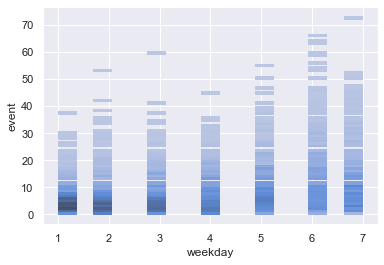

In [81]:
sns.histplot(data=grouped_logins, x='weekday', y='event')

Text(0, 0.5, 'Event Counts')

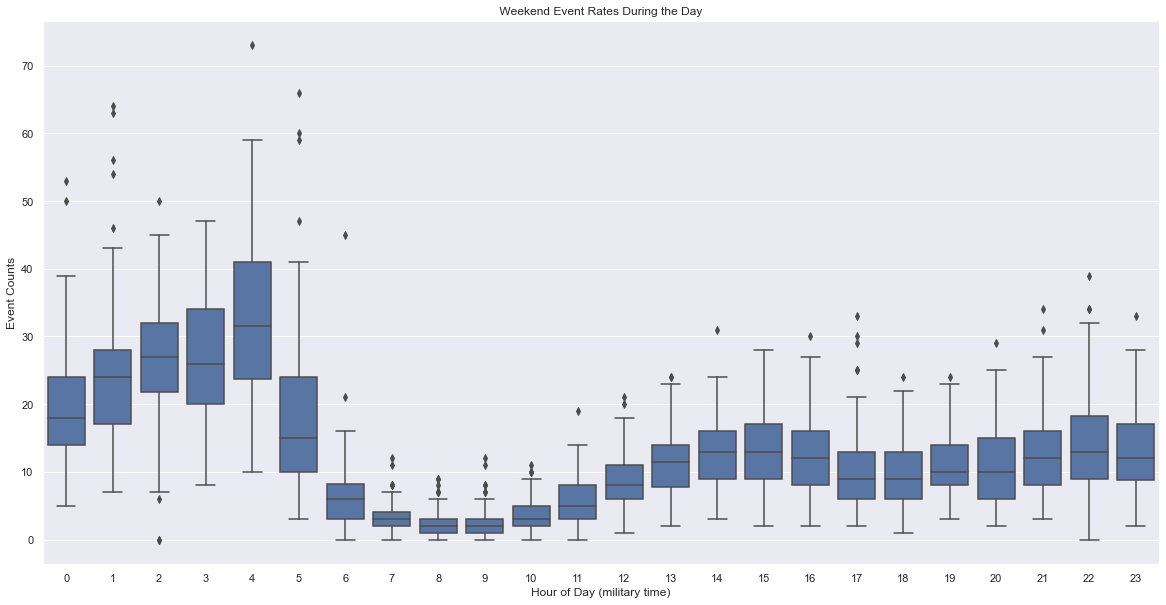

In [60]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=weekend, x='hour', y='event', color = 'b')
plt.title(' Weekend Event Rates During the Day ')
plt.xlabel('Hour of Day (military time)')
plt.ylabel('Event Counts')

Text(0, 0.5, 'Event Counts')

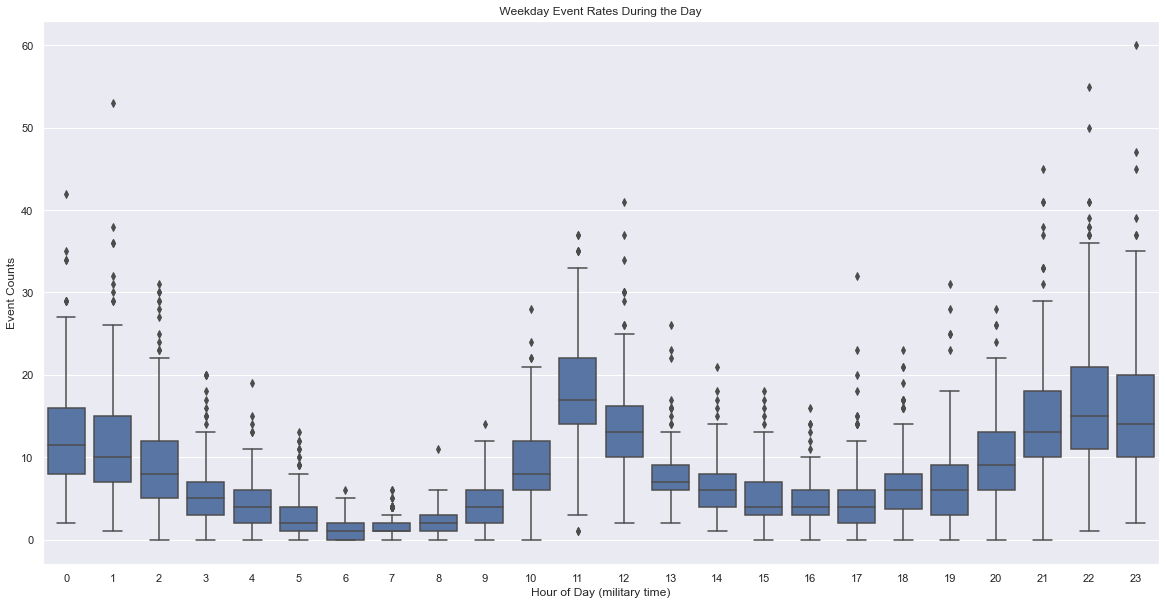

In [61]:
plt.figure(figsize=(20,10))
sns.boxplot(data=weekday, x='hour', y='event', color = 'b')
plt.title(' Weekday Event Rates During the Day ')
plt.xlabel('Hour of Day (military time)')
plt.ylabel('Event Counts')

Text(0, 0.5, 'Event Counts')

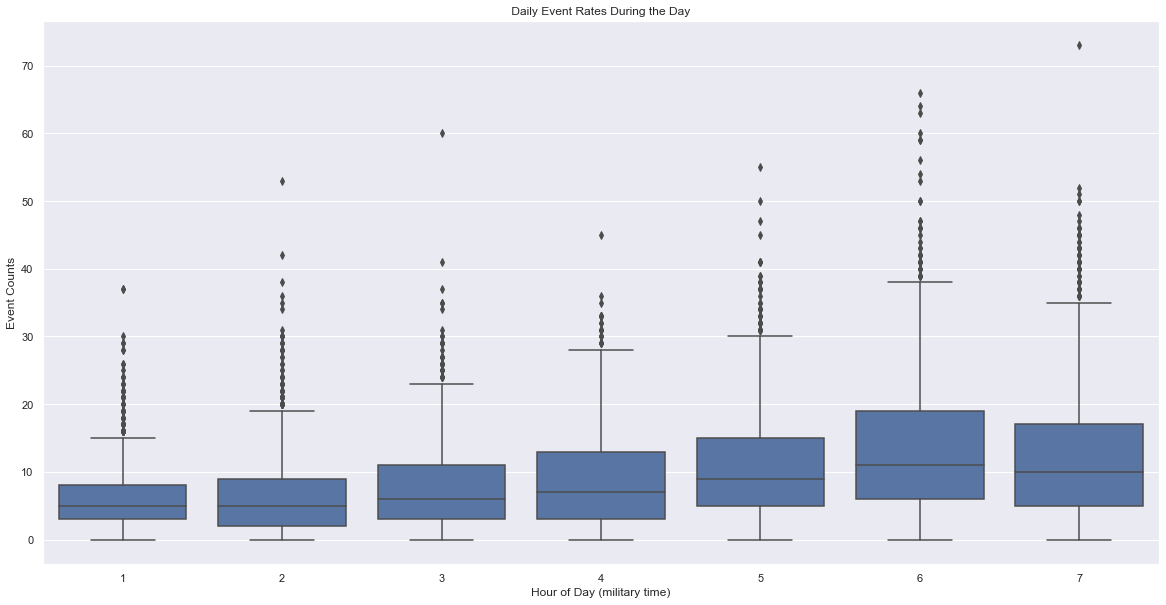

In [71]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=grouped_logins, x='weekday', y='event', color = 'b')
plt.title(' Daily Event Rates During the Day ')
plt.xlabel('Hour of Day (military time)')
plt.ylabel('Event Counts')

Text(0, 0.5, 'Event Counts')

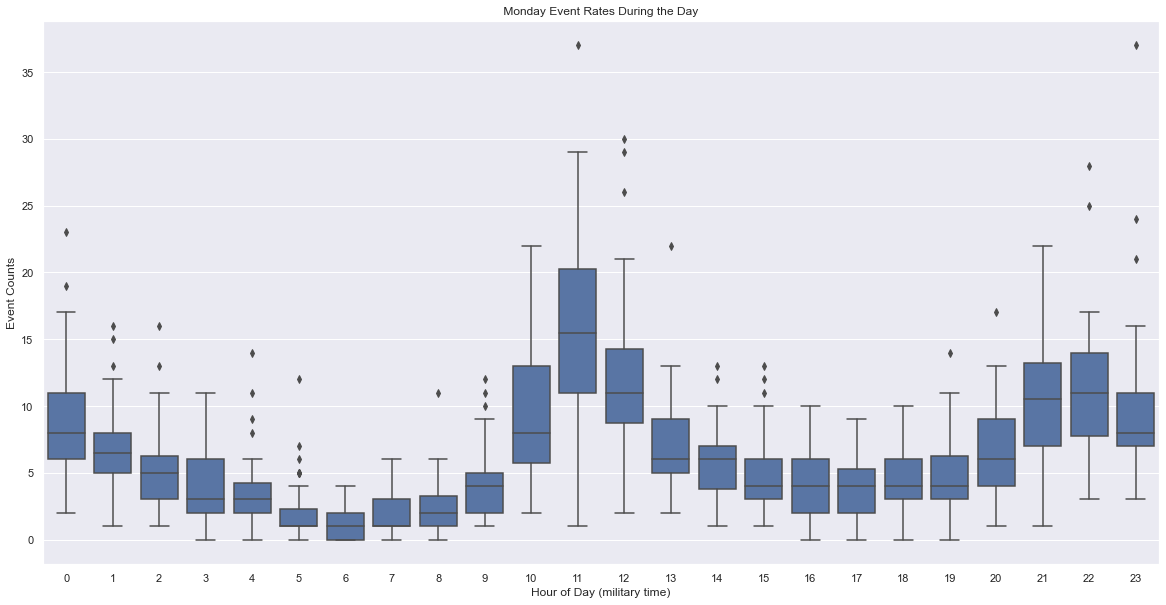

In [74]:
Monday = grouped_logins.loc[grouped_logins.weekday == 1]
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=Monday, x='hour', y='event', color = 'b')
plt.title(' Monday Event Rates During the Day ')
plt.xlabel('Hour of Day (military time)')
plt.ylabel('Event Counts')

Text(0, 0.5, 'Event Counts')

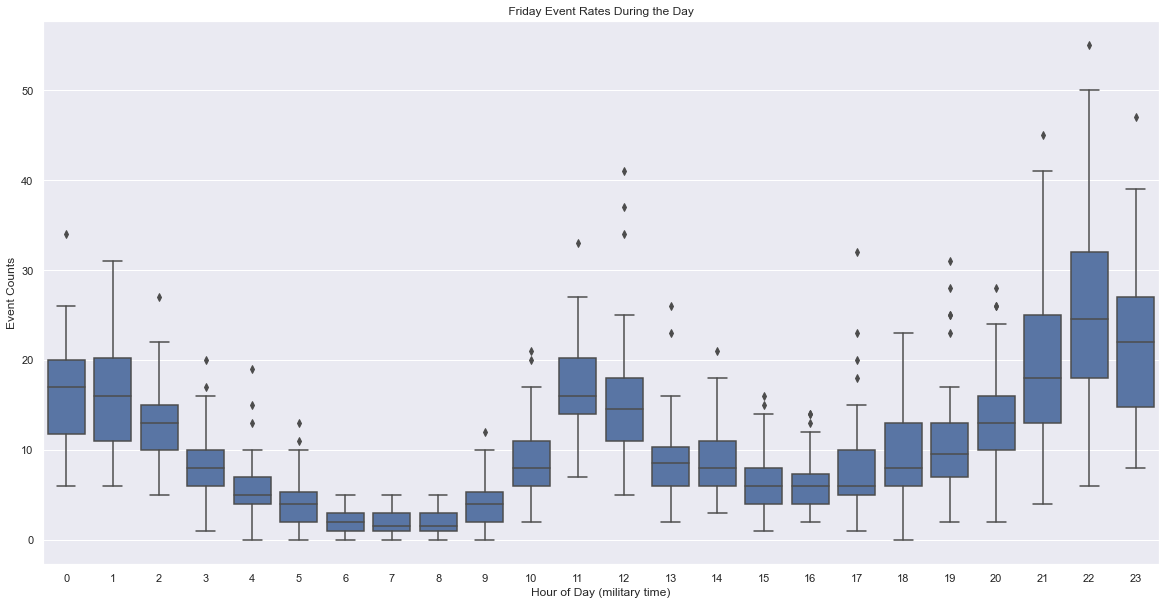

In [76]:
Friday = grouped_logins.loc[grouped_logins.weekday == 5]
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=Friday, x='hour', y='event', color = 'b')
plt.title(' Friday Event Rates During the Day ')
plt.xlabel('Hour of Day (military time)')
plt.ylabel('Event Counts')

Text(0, 0.5, 'Event Counts')

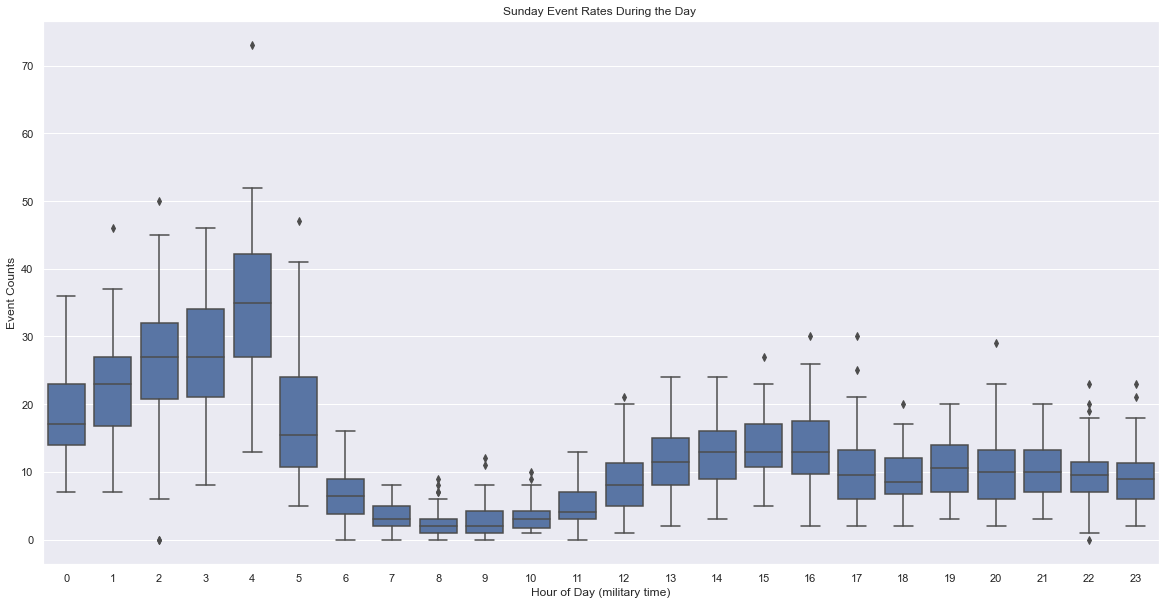

In [77]:
Sunday = grouped_logins.loc[grouped_logins.weekday == 7]
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=Sunday, x='hour', y='event', color = 'b')
plt.title('Sunday Event Rates During the Day ')
plt.xlabel('Hour of Day (military time)')
plt.ylabel('Event Counts')

Text(0, 0.5, 'Event Counts')

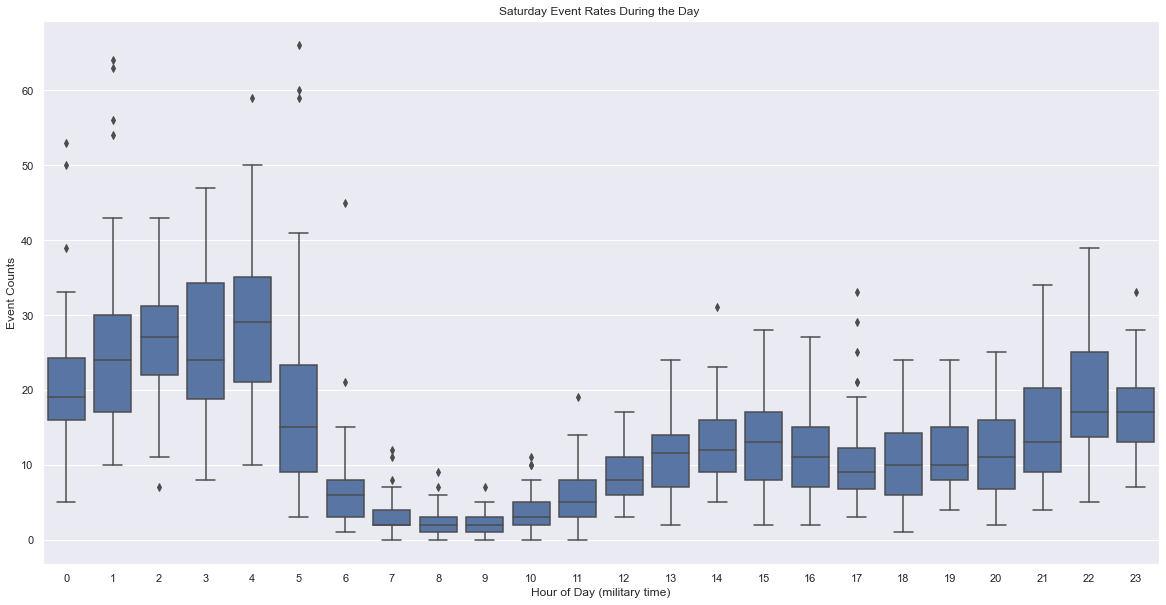

In [79]:
Saturday = grouped_logins.loc[grouped_logins.weekday == 6]
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=Saturday, x='hour', y='event', color = 'b')
plt.title('Saturday Event Rates During the Day ')
plt.xlabel('Hour of Day (military time)')
plt.ylabel('Event Counts')

### Observation:
* The weekend data exhibits peaks in logins at the following times.
    * User logins trend increases from 9am until 3pm at which time the levels stabilize until mignight
    * From midnight to 4 am there is a peak in service usage
    
* The weekday data exhibits peaks in logins at the following times.
    * Between 10am to 12 pm (lunch time)
    * From 5 pm through midnight
    
* Weekend login activity accounts for 40% of the total usage
* weekday login activity accounts for 60% of the total usage
* The median login activity increases monotonically from monday to its peak on Saturday.
* The median login activity is highest on Saturday and Sunday

Text(0, 0.5, 'Event Counts')

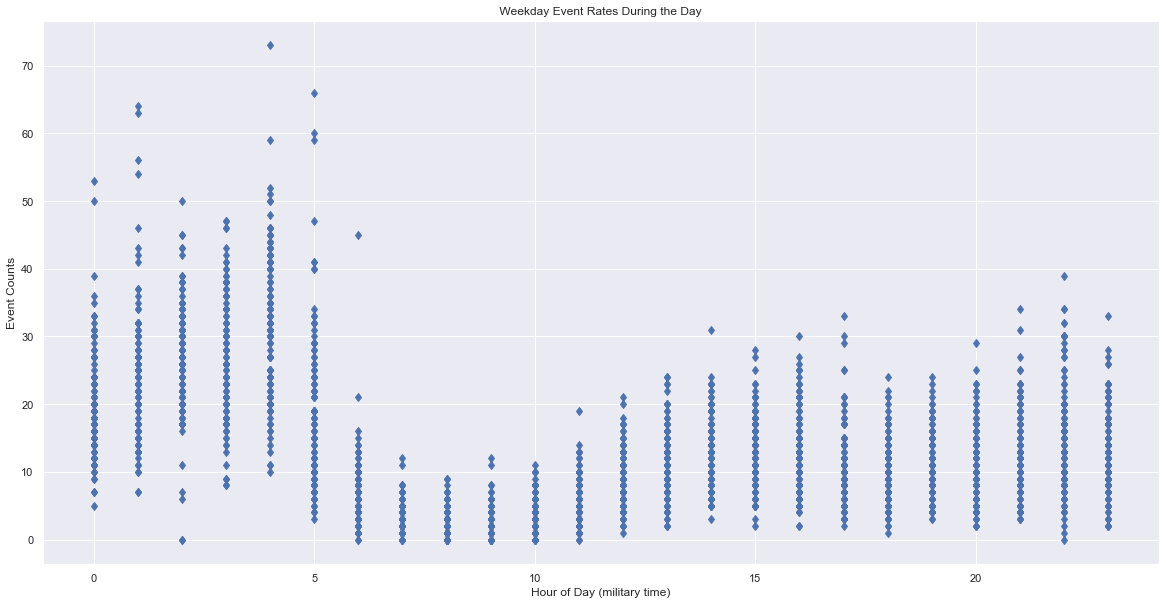

In [50]:
plt.figure(figsize=(20,10))
plt.plot(weekend.hour, weekend.event, linestyle='', marker='d')
plt.title(' Weekday Event Rates During the Day ')
plt.xlabel('Hour of Day (military time)')
plt.ylabel('Event Counts')

Text(0, 0.5, 'Event Counts')

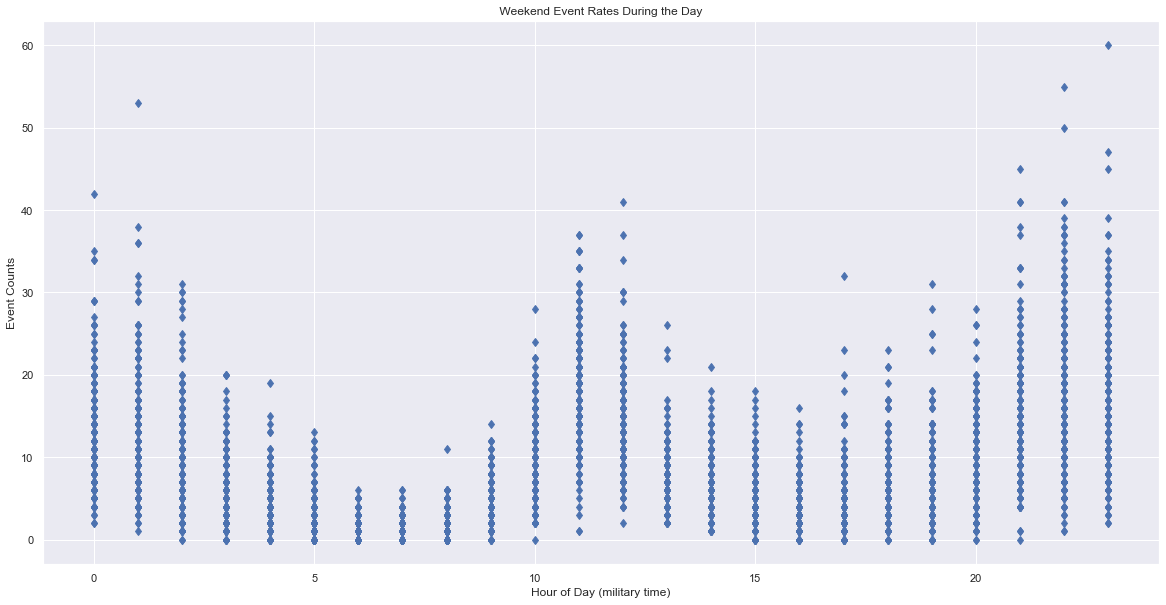

In [51]:
plt.figure(figsize=(20,10))
plt.plot(weekday.hour, weekday.event, linestyle='', marker='d')
plt.title(' Weekend Event Rates During the Day ')
plt.xlabel('Hour of Day (military time)')
plt.ylabel('Event Counts')

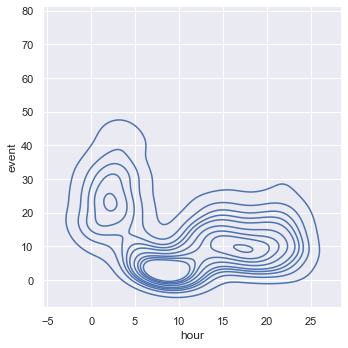

In [54]:
sns.displot(data=weekend, y= 'event', x='hour', kind='kde')

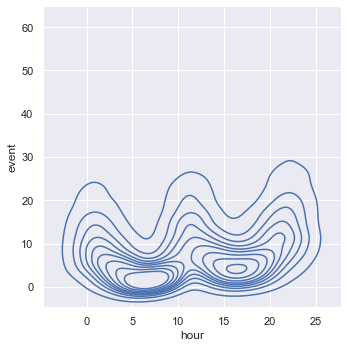

In [55]:
sns.displot(data=weekday, y= 'event', x='hour', kind='kde')

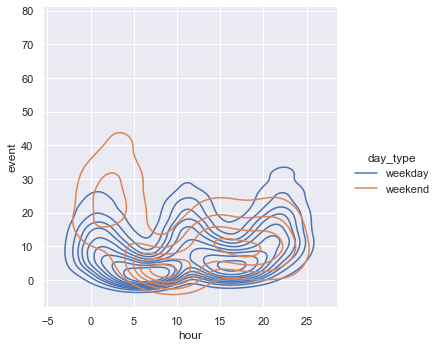

In [56]:
sns.displot(data=grouped_logins, y= 'event', x='hour', hue = 'day_type', kind='kde')

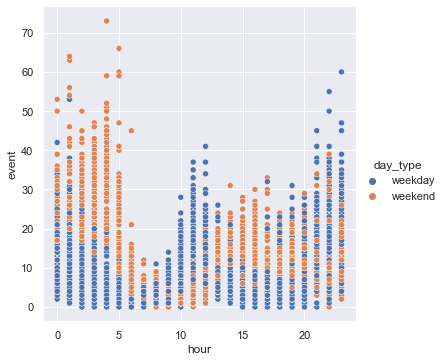

In [57]:
sns.relplot(data=grouped_logins, x='hour', y='event',hue='day_type')

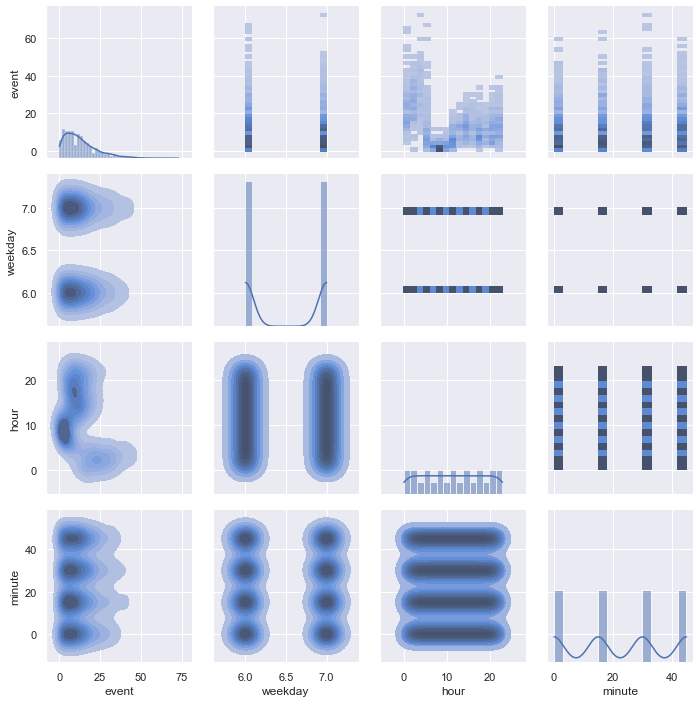

In [58]:
g = sns.PairGrid(weekend)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

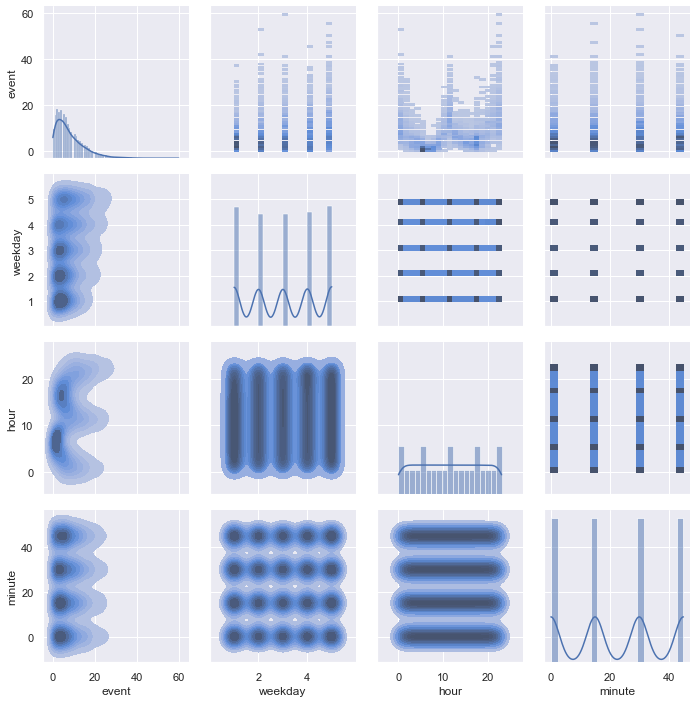

In [59]:
g = sns.PairGrid(weekday)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)